#                                        covid 19 analysis

# Import libraries

In [1]:
import pandas as pd 
import jinja2 as ji
import matplotlib.pyplot as plt
import plotly.express as px


# Read csv file

In [2]:
df = pd.read_csv(r"C:\Users\Harshit\Downloads\covid-19 data\covid_19_india.csv")


# Droping some columns

In [3]:
df.drop(["ConfirmedIndianNational","ConfirmedForeignNational","Sno"],axis=1,inplace=True)

In [4]:
df.drop("Time",axis=1,inplace=True)

# Convert date column in date format

In [5]:
df["Date"]=pd.to_datetime(df["Date"],format='%Y-%m-%d')

# Active cases

In [6]:
df["ActiveCase"]=df["Confirmed"]-(df["Deaths"]+df["Cured"])

In [7]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCase
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


# make pivot table 

In [8]:
StateWise =pd.pivot_table(df,values =["Confirmed","Deaths","Cured","ActiveCase"],index = ["State/UnionTerritory"],aggfunc=max)

C:\Users\Harshit\AppData\Local\Temp\ipykernel_23436\581018757.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  StateWise =pd.pivot_table(df,values =["Confirmed","Deaths","Cured","ActiveCase"],index = ["State/UnionTerritory"],aggfunc=max)


# find  Recovery rate and Motality rate 

In [9]:
StateWise["RecoveryRate"]=StateWise["Cured"]*100/StateWise["Confirmed"]
StateWise["MotalityRate"]=StateWise["Deaths"]*100/StateWise["Confirmed"]

# sort columns highest to lowest

In [10]:
StateWise=StateWise.sort_values(by="Confirmed",ascending=False)

***visualization***

In [11]:
StateWise.style.background_gradient(cmap="cubehelix")

,ActiveCase,Confirmed,Cured,Deaths,RecoveryRate,MotalityRate
State/UnionTerritory,,,,,,
Maharashtra,701614.000000,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,605515.000000,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,445692.000000,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,242929.000000,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,310783.000000,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,211554.000000,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,103424.000000,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,131948.000000,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,131245.000000,925531.000000,823113.000000,12036.000000,88.934136,1.300443


# top 10 active cases states

In [12]:
top10_active_cases_state = df.groupby(by='State/UnionTerritory').max()[['ActiveCase']]
acs=top10_active_cases_state.sort_values(by=['ActiveCase'],ascending=False).head(5)


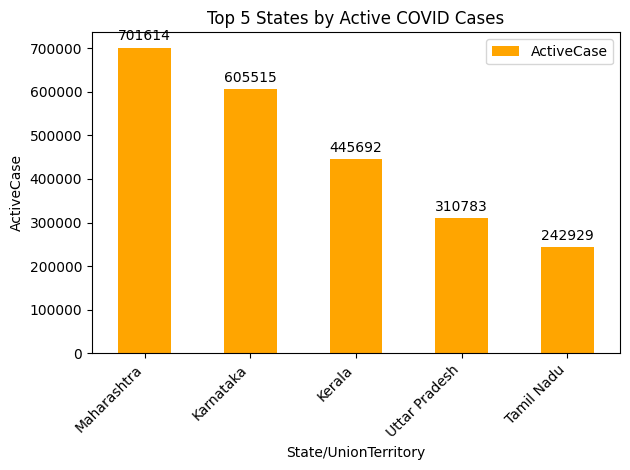

In [13]:
ax = acs.plot( kind='bar',  color='orange')
plt.title('Top 5 States by Active COVID Cases')
plt.xlabel('State/UnionTerritory')
plt.ylabel('ActiveCase')
plt.xticks(rotation=45, ha='right')

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


According to top 5 active cases chat maharashtra,karnataka,kerala,uttar pradesh,tamil nadu have higest active cases
* suggestion--
1. increase vaccination camps in those states
2. spread awarness about covid symtoms in local areas
3. increase lockdown time period 
4. increase the arrangment of beds,oxygen,mask,sanitizer,vaccine in those states hospital

# top states with highest deaths

In [14]:
top10_deaths = df.groupby(by='State/UnionTerritory').max()[['Deaths']]
td=top10_deaths.sort_values(by='Deaths',ascending=False).head(5)

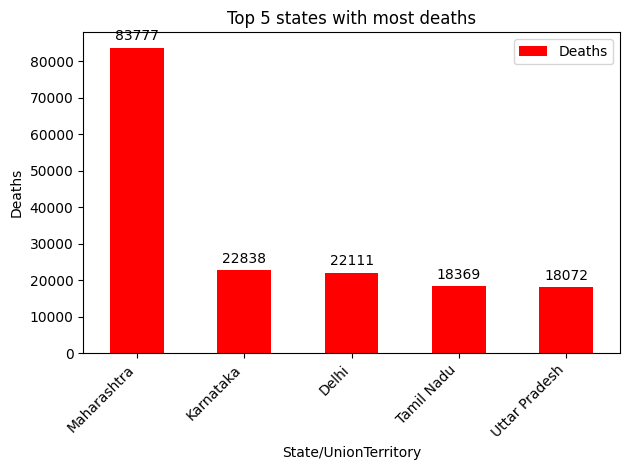

In [15]:
ad = td.plot( kind='bar',  color='red')
plt.title('Top 5 states with most deaths')
plt.xlabel('State/UnionTerritory')
plt.ylabel('Deaths')
plt.xticks(rotation=45, ha='right')

# Add labels on bars
for container in ad.containers:
    ad.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


maharashtra have higest number of deaths according to top 5 states with higest no. of deaths
* analyize which safty standerds is lacking in maharashtra which cause masive numbers of deaths (hospitality,not following lockdown and any other rules)
* death body should be buried with safty standerds. gathering is not allowed

# Growth trend

In [16]:


top5_states =acs.index
top5_data = df[df['State/UnionTerritory'].isin(top5_states)]

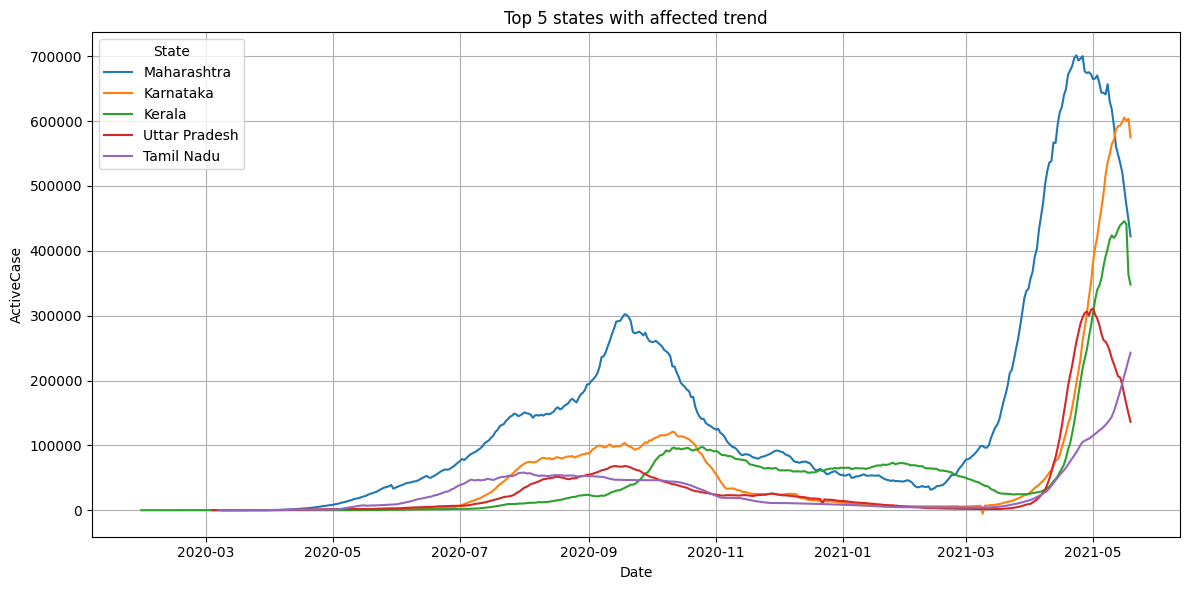

In [17]:


plt.figure(figsize=(12,6))

for state in top5_states:
    state_data = top5_data[top5_data['State/UnionTerritory'] == state]
    plt.plot(state_data['Date'], state_data['ActiveCase'], label=state)

plt.title('Top 5 states with affected trend')
plt.xlabel('Date')
plt.ylabel('ActiveCase')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()
plt.show()


According to the trend chart
* maharshtra--
first wave is start at 2020-05 and reached 300000 active cases an decrese 2020-11 to below 100000
second wave start at 2021-03 and reached 700000 active cases an decrease 2021-07
* karnatka--
first wave start at 2020-07 and reached 100000 active cases an decrese 2020-12
second wave start at 2021-04 reached 600000 active cases an decrese 2021-07
* kerala--
fiest wave start at 2020-07 maintain 80000 to 100000 and boom at 2021-04 to reach 4.3lakhs
* uttar pradesh--
uttar pradesh is below 100000 and sudden increse in 2021-03 to reach 300000 and decrese in 2021-06
* tamil nadu--
tamil nadu aslo below 70000 and sudden increse in 2021-03 to reach 300000

# import 2 dataset

In [18]:
vdf = pd.read_csv(r"C:\Users\Harshit\Downloads\covid-19 data\covid_vaccine_statewise.csv")

In [19]:
vdf.rename(columns={'Updated On':'vaccine_date'},inplace=True)
vdf.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)

In [20]:
vaccine=vdf.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

# male vs female vaccination

In [21]:
male = vaccine["Male(Individuals Vaccinated)"].sum()
female = vaccine["Female(Individuals Vaccinated)"].sum()

In [22]:
px.pie(names=["Male","Female"],values=[male,female],title="Male VS Female vaccination")

remove rows where states is india 

In [23]:
v = vdf[vdf.State!='India']

# most vaccinated state

In [24]:
max_vacc = v.groupby('State')["Total"].sum().to_frame('Total')
max_v=max_vacc.sort_values('Total',ascending=False).head(5)


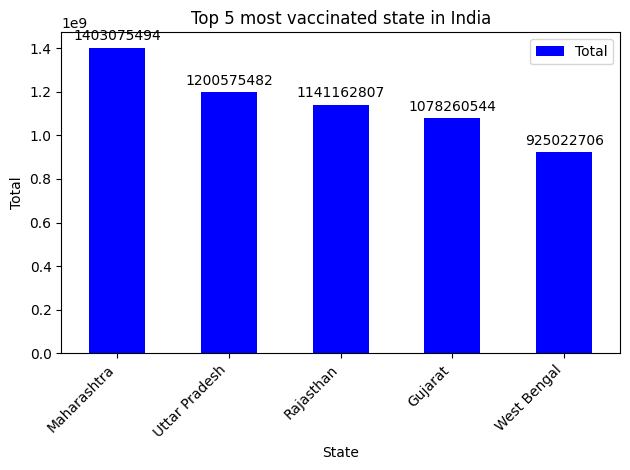

In [25]:
mv= max_v.plot( kind='bar',  color='blue')
plt.title('Top 5 most vaccinated state in India')
plt.xlabel('State')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')

# Add labels on bars
for container in mv.containers:
    mv.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


# least vaccinated states in india 

In [26]:
min_vacc = v.groupby('State')["Total"].sum().to_frame('Total')
min_v=min_vacc.sort_values('Total',ascending=True).head(5)


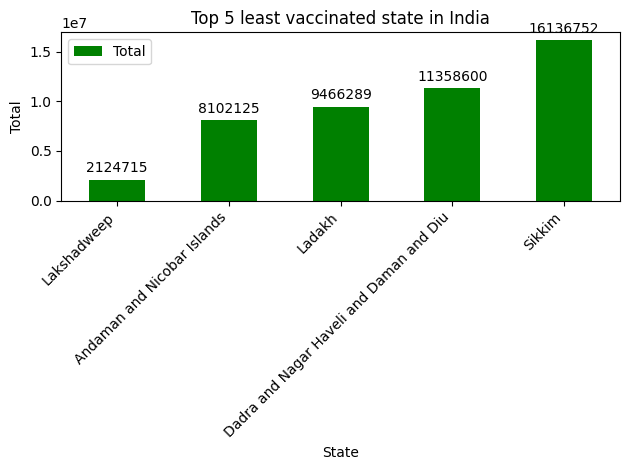

In [27]:
lv= min_v.plot( kind='bar',  color='green')
plt.title('Top 5 least vaccinated state in India')
plt.xlabel('State')
plt.ylabel('Total')
plt.xticks(rotation=45, ha='right')

# Add labels on bars
for container in lv.containers:
    lv.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()
